<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [1]:
import numpy as np
from sympy import *
x = Symbol('x', real=True)

In [6]:
func = {
    'f': x**2 - 30*x + 1,
    'g': -x**3 + 5*x - 7*x**2 + 17,
    'h': x**2 - 1/x,
    'j': 1/(x**5) + x**17 + 8
}

In [13]:
def analyze_function(f):
    first_derivative = diff(f, x)
    second_derivative = diff(first_derivative, x)

    # Минимум/максимум
    critical_points = solve(first_derivative, x)

    # Точки перегиба
    inflection_points = solve(second_derivative, x)
    return { 'f': f,
             'critical_points':critical_points,
             'inflection_points':inflection_points
             }


In [14]:
results = []
for name, expr in func.items():
    res = analyze_function(expr)
    results.append(res)

## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [ ]:
# f(x) Выведено вручную, что нет точек перегиба

In [ ]:
# Для  h(x)  нет точки перегиба в вещественном поле.
# Уравнение примет форму x^22 = -15/136

### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

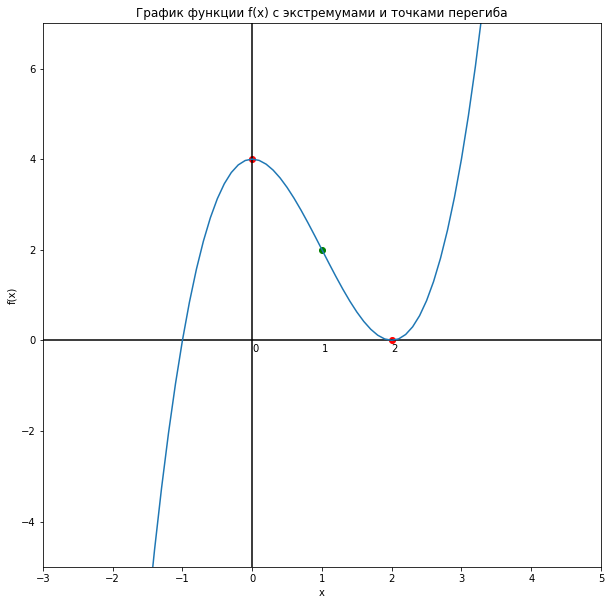

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
np.random.RandomState(42);

In [10]:
def plot_results(results, start, end, count, bias):
    f, critical_points, inflection_points = results['f'], results['critical_points'], results['inflection_points']
    x = symbols('x')
    func = lambdify(x, f, 'numpy')

    x_values = np.linspace(start, end, count)
    x_values = x_values[np.abs(x_values) > 1e-6]
    f_values = func(x_values)

    plt.figure(figsize=(8, 6))
    plt.axvline(x=0, color='grey')
    plt.axhline(y=0, color='grey')

    plt.plot(x_values, f_values, label=f'Функция: {f}', color='blue')

    critical_points_real = [float(point) for point in critical_points if im(point) == 0]
    inflection_points_real = [float(point) for point in inflection_points if im(point) == 0]

    for idx, point in enumerate(critical_points_real):
        y_value = func(point)
        plt.scatter(point, y_value, color='red', zorder=5, label='Экстремум')
        plt.annotate(f'Экстремум ({round(point, 2)}, {round(y_value, 2)})',  xy=(point, y_value), xytext=(point + (-1)*idx*(bias/100), y_value + (-1)* (bias)*idx), fontsize=8)

    for point in inflection_points_real:
        y_value = func(point)
        plt.scatter(point, y_value, color='green', zorder=5, label='Точка перегиба')
        plt.annotate(f'Точка перегиба ({round(point, 2)}, {round(y_value, 2)})', xy=(point, y_value), xytext=(point + 0.2, y_value + (bias)*idx), fontsize=8)

    plt.xlabel('Ось x')
    plt.ylabel('Ось y')
    plt.title(f"График функции: {f}")
    plt.legend()
    plt.show()


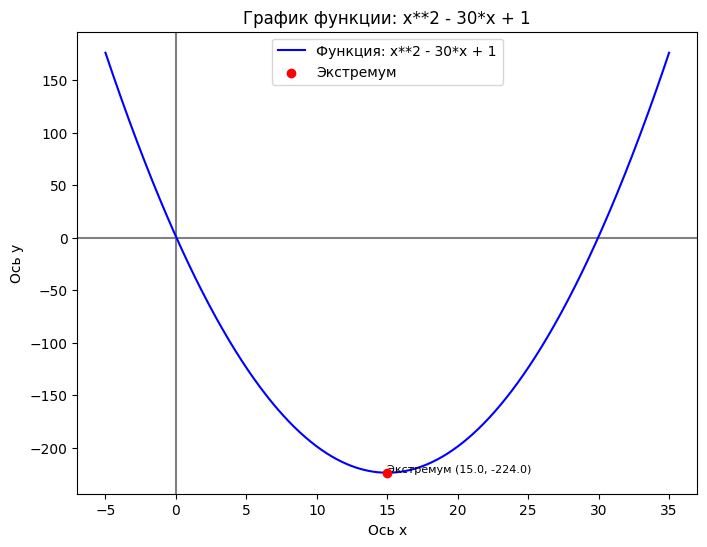

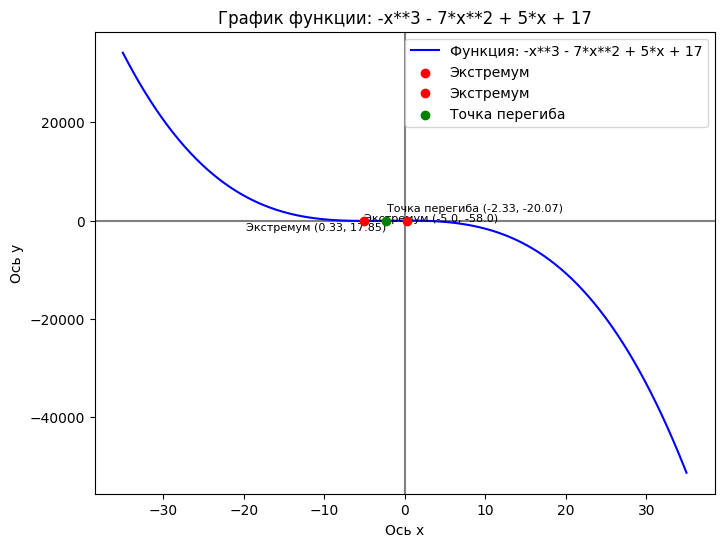

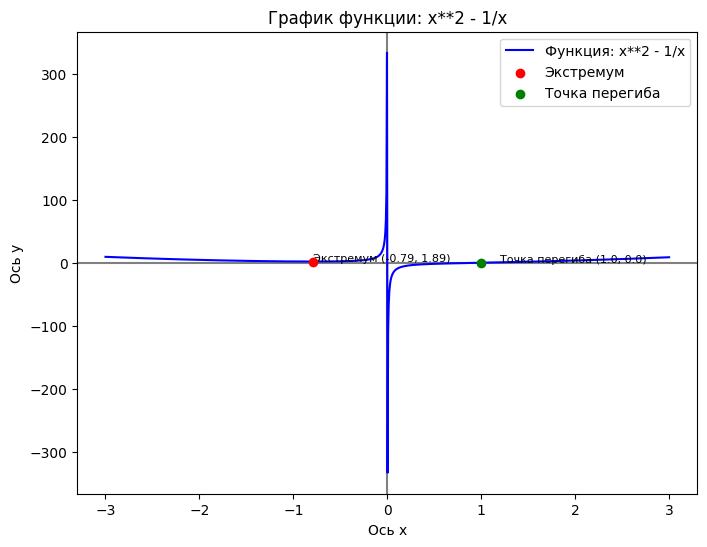

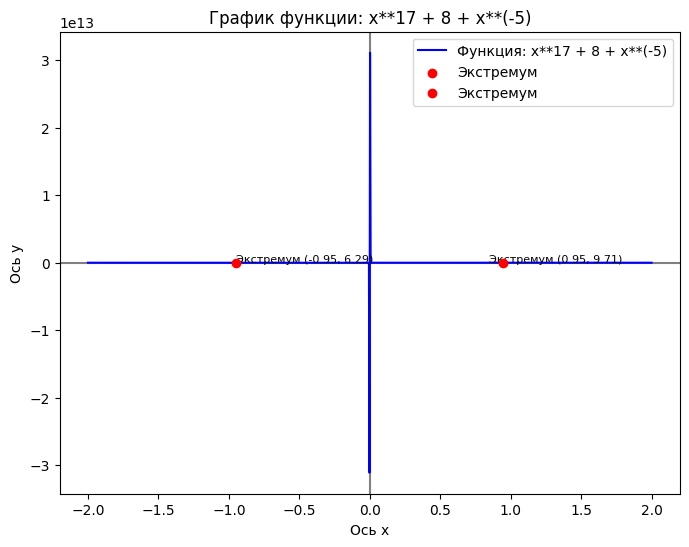

In [15]:
linspace = [
    (-5, 35, 1000, 10),
    (-35, 35, 1000, 2000),
    (-3, 3, 1000, 10),
    (-2, 2, 1000, 10)
]

for result, (s, e, c, bias) in zip(results, linspace):
  plot_results(result, s, e, c, bias)

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [79]:
grad_descent_iters = []
def grad_descent_with_delta(grad_f, x0, lr=0.01, max_iter=100, epsilon=1e-6, delta=1e-6):
    x_curr = x0
    for i in range(max_iter):
        grad_value = grad_f(x_curr)
        grad_value = np.clip(grad_value, -1e6, 1e6)
        x_next = x_curr - lr * grad_value

        if abs(x_next - x_curr) < epsilon:
            break
        elif abs(grad_value) < delta:
            break

        x_curr = x_next
    # print(f'Количество итераций: {i+1}')
    grad_descent_iters.append(i+1)
    return x_curr

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [49]:
import math

def f(x):

  return x**2 - 30*x + 1

def grad_f(x):
  return 2*x - 30

def second_grad_f(x):
  return 2

def g(x):
  return -x**3 + 5*x - 7*x**2 +17

def grad_g(x):
  return -3*x**2 + 5 - 14*x

def second_grad_g(x):
  return -6*x

def h(x):
  return x**2 - 1/x

def j(x):
  return 1/(x**5) + x**17 + 8

def grad_h(x):
  return 2*x + 1/x**2

def grad_j(x):
  return -5/(math.pow(x, 6)) + 17*math.pow(x,16)

def second_grad_h(x):
  return 2 - 2/x**3

def grad_j(x):
  return -5 + 17*math.pow(x,22)

def second_grad_j(x):
  return 272*math.pow(x,22) + 30

f.__doc__ = "f(x) = x^2 - 30*x + 1"
g.__doc__ = "g(x) = -x^3 + 5*x - 7*x^2 + 17"
h.__doc__ = "h(x) = x^2 - 1/x"
j.__doc__ = "j(x) = 1/x^5 + x^17 + 8"

functions = [f, g, h, j]
grad_functions = [grad_f, grad_g, grad_h, grad_j]
second_grad_functions = [second_grad_f, second_grad_g, second_grad_h, second_grad_j]

In [129]:
x0_list = [random.randint(-5, 100) for _ in range(25)]
lr_list = [0.1, 0.01, 0.001, 0.0001]

In [125]:
x_min = results[0]['critical_points'][0]
print('Минимум функции f(x): ', x_min)

Минимум функции f(x):  15


In [182]:
partial_results  = []
params = []

def find_extremum(func, grad_func, x_min):
  for x0 in x0_list:
    for lr in lr_list:
      x_extr = grad_descent_with_delta(grad_func, x0, lr=lr)
      if x_extr == x_min:
        print(f'Экстремум функции {func.__doc__}:  {x_min} при x0 = {x0} и lr = {lr}')
        return func, x_extr
      else:
          params.append((x0, lr, func))
          partial_results.append(x_extr)

  closest_value = min(partial_results, key = lambda x: abs(x - x_min))
  idx = partial_results.index(closest_value)
  print(f'Экстремум функции {func.__name__}:  {closest_value:.4f} при x0 = {params[idx][0]} и lr = {params[idx][1]}')
  return func.__name__, closest_value

In [183]:
results_2 = {
  'f': [],
  'g': [],
  'h': [],
  'j': []
}
for func, grad_func, res in zip(functions, grad_functions, results):
  for x_min in res['critical_points']:
    name, x_extr = find_extremum(func, grad_func, float(x_min))
    results_2[name].append(x_extr)

Экстремум функции f:  15.0000 при x0 = 53 и lr = 0.1
Экстремум функции g:  -5.0000 при x0 = -1 и lr = 0.1
Экстремум функции g:  -0.5528 при x0 = -4 и lr = 0.001
Экстремум функции h:  -0.7937 при x0 = 29 и lr = 0.1
Экстремум функции j:  -0.9182 при x0 = -1 и lr = 0.001
Экстремум функции j:  0.8914 при x0 = 8 и lr = 0.01


In [54]:
def plot_results_2(critical_points, func, start, end, count, bias):
    x_values = np.linspace(start, end, count)
    x_values = x_values[np.abs(x_values) > 1e-6]
    f_values = func(x_values)

    plt.figure(figsize=(8, 6))
    plt.axvline(x=0, color='grey')
    plt.axhline(y=0, color='grey')

    plt.plot(x_values, f_values, label=f'Функция {func.__doc__}', color='blue')

    for idx, point in enumerate(critical_points):
        y_value = func(point)
        plt.scatter(point, y_value, color='red', zorder=5, label='Экстремум')
        plt.annotate(f'Экстремум ({round(point, 2)}, {round(y_value, 2)})',  xy=(point, y_value), xytext=(point + (-1)*idx*(bias/100), y_value + (-1)* (bias)*idx), fontsize=8)

    plt.xlabel('Ось x')
    plt.ylabel('Ось y')
    plt.title(f"График функции: {func.__doc__}")
    plt.legend()
    plt.show()


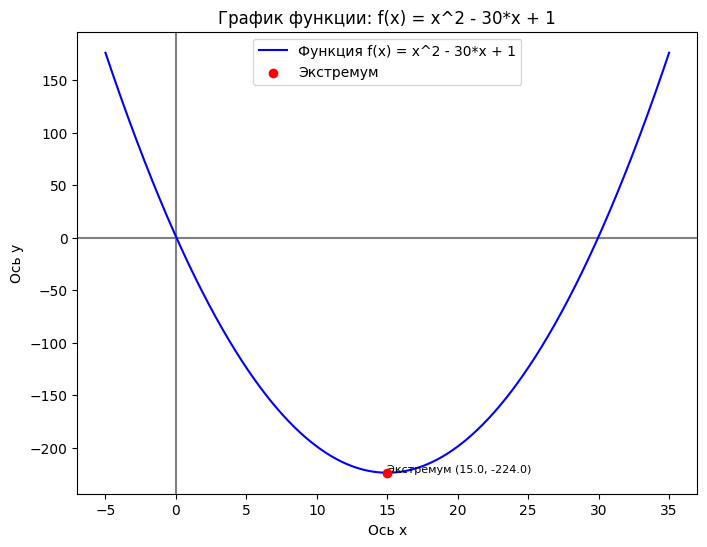

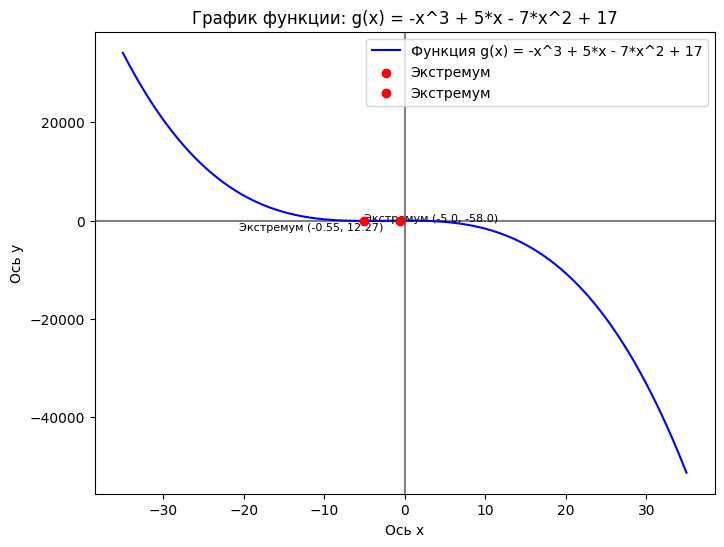

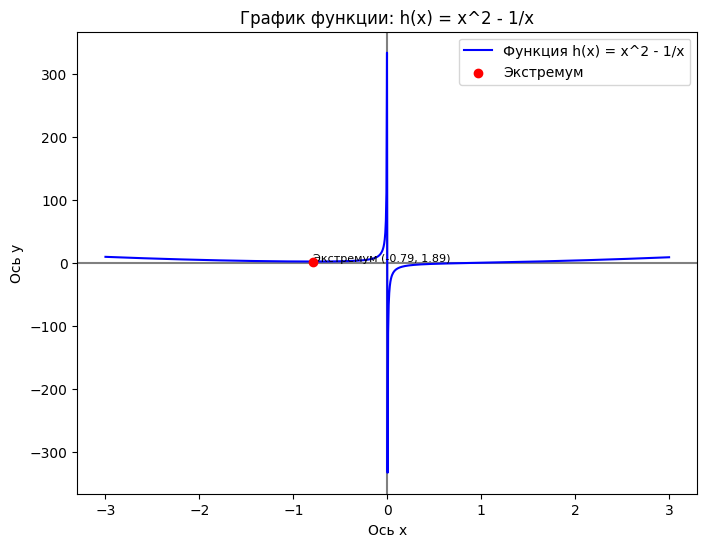

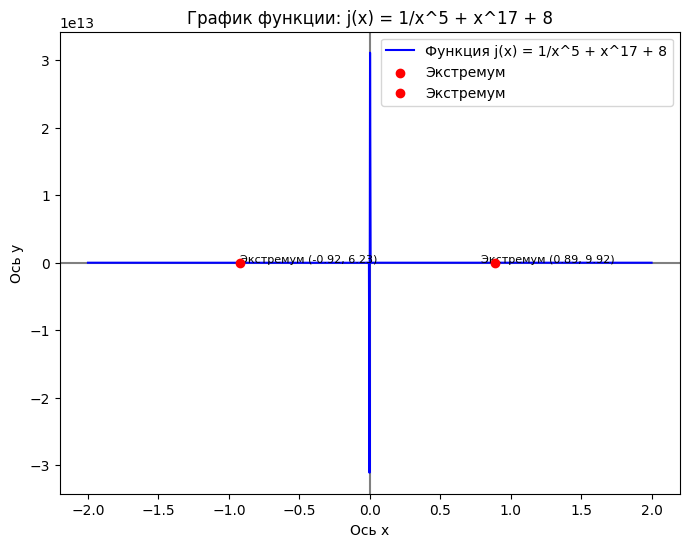

In [187]:
linspace = [
    (-5, 35, 1000, 10),
    (-35, 35, 1000, 2000),
    (-3, 3, 1000, 10),
    (-2, 2, 1000, 10)
]

for points, f, (s, e, c, bias) in zip(results_2.values(), functions, linspace):
  plot_results_2(points, f, s, e, c, bias)

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [80]:
newton_iters = []
def newton_method(grad_func, hess_func, x0, lr=0.01, max_iter=100, epsilon=1e-6):
  x_curr = x0

  for i in range(max_iter):
    grad_value = grad_func(x_curr)
    grad_value = np.clip(grad_value, -1e2, 1e2)
    hess_value = hess_func(x_curr)
    hess_value = np.clip(hess_value, -1e2, 1e2)
    x_next = x_curr - lr * grad_value / hess_value

    if abs(x_next - x_curr) < epsilon:
      break

    x_curr = x_next
  # print(f'Количество итераций: {i+1}')
  newton_iters.append(i+1)
  return x_curr


## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [51]:
x0_list = [random.randint(-5, 100) for _ in range(25)]
lr_list = [0.1, 0.01, 0.001, 0.0001]

In [42]:
partial_results  = []
params = []

def find_newton_extremum(func, grad_func, hess_func, x_min):
  for x0 in x0_list:
    for lr in lr_list:
      x_extr = newton_method(grad_func, hess_func, x0, lr=lr)
      if x_extr == x_min:
        print(f'Экстремум функции {func.__doc__}:  {x_min} при x0 = {x0} и lr = {lr}')
        return func, x_extr
      else:
          params.append((x0, lr, func))
          partial_results.append(x_extr)

  closest_value = min(partial_results, key = lambda x: abs(x - x_min))
  idx = partial_results.index(closest_value)
  print(f'Экстремум функции {func.__name__}:  {closest_value:.4f} при x0 = {params[idx][0]} и lr = {params[idx][1]}')
  return func.__name__, closest_value

In [55]:
results_3 = {
  'f': [],
  'g': [],
  'h': [],
  'j': []
}
for func, grad_func, second_grad, res in zip(functions, grad_functions, second_grad_functions, results):
  for x_min in res['critical_points']:
    name, x_extr = find_newton_extremum(func, grad_func, second_grad, float(x_min))
    print()
    results_3[func.__name__].append(x_extr)

Экстремум функции f(x) = x^2 - 30*x + 1:  15.0 при x0 = 15 и lr = 0.1

Экстремум функции g(x) = -x^3 + 5*x - 7*x^2 + 17:  -5.0 при x0 = -5 и lr = 0.1

Экстремум функции g:  0.3333 при x0 = 78 и lr = 0.1



<ipython-input-46-2f1f9196903e>:9: RuntimeWarning: divide by zero encountered in scalar divide
  x_next = x_curr - lr * grad_value / hess_value
<ipython-input-46-2f1f9196903e>:11: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(x_next - x_curr) < epsilon:


Экстремум функции h:  -0.7937 при x0 = 4 и lr = 0.1

Экстремум функции j:  -0.9801 при x0 = 42 и lr = 0.1

Экстремум функции j:  0.9459 при x0 = 1 и lr = 0.1



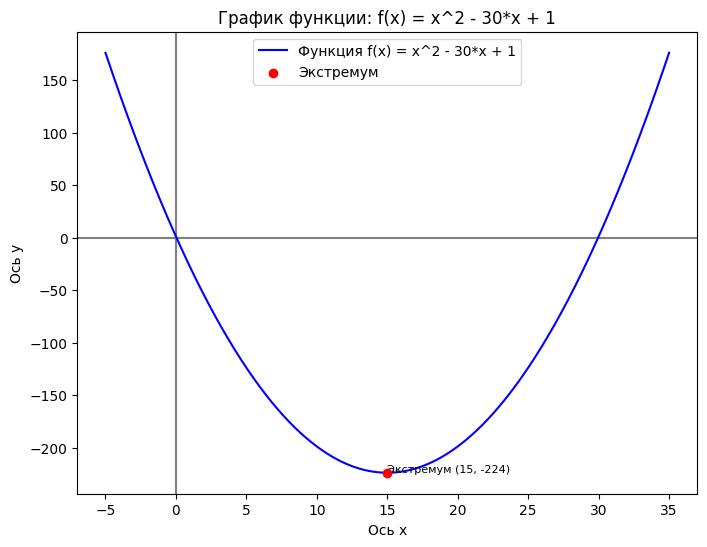

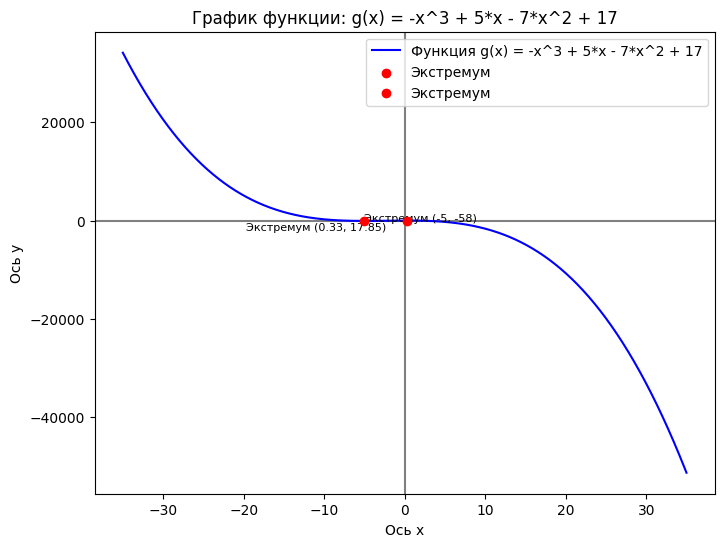

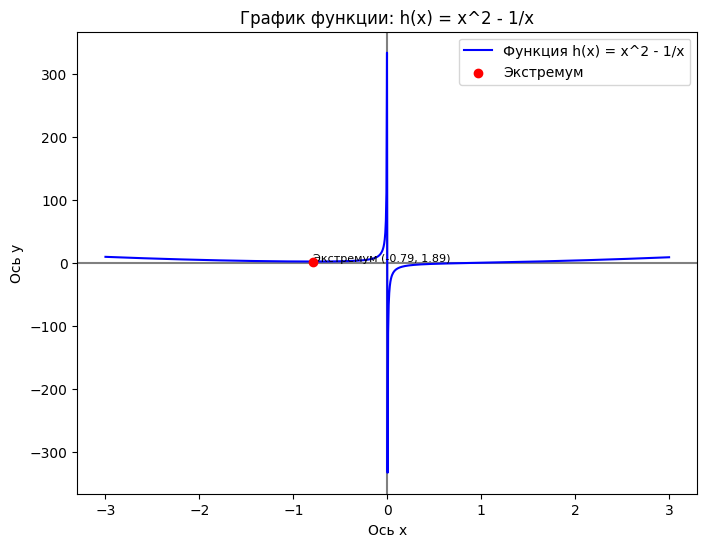

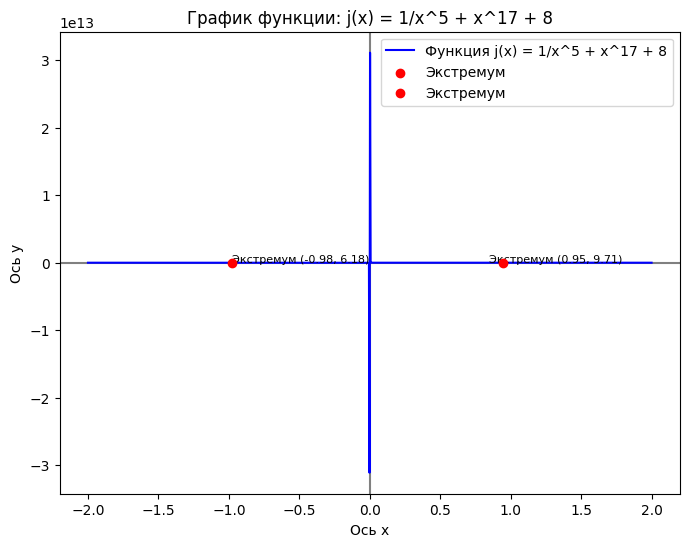

In [56]:
linspace = [
    (-5, 35, 1000, 10),
    (-35, 35, 1000, 2000),
    (-3, 3, 1000, 10),
    (-2, 2, 1000, 10)
]

for points, f, (s, e, c, bias) in zip(results_3.values(), functions, linspace):
  plot_results_2(points, f, s, e, c, bias)

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

```
Метод градиентного спуска
Экстремум функции f:  15.0000 при x0 = 53 и lr = 0.1
Экстремум функции g:  -5.0000 при x0 = -1 и lr = 0.1
Экстремум функции g:  -0.5528 при x0 = -4 и lr = 0.001
Экстремум функции h:  -0.7937 при x0 = 29 и lr = 0.1
Экстремум функции j:  -0.9182 при x0 = -1 и lr = 0.001
Экстремум функции j:  0.8914 при x0 = 8 и lr = 0.01
```



```
Метод Ньютона
Экстремум функции f:  15.0 при x0 = 15 и lr = 0.1
Экстремум функции g: -5.0 при x0 = -5 и lr = 0.1
Экстремум функции g:  0.3333 при x0 = 78 и lr = 0.1
Экстремум функции h:  -0.7937 при x0 = 4 и lr = 0.1
Экстремум функции j:  -0.9801 при x0 = 42 и lr = 0.1
Экстремум функции j:  0.9459 при x0 = 1 и lr = 0.1
```



In [67]:
for res in results:
  print('real extremum: ', [x.evalf() for x in res['critical_points']])

real extremum:  [15.0000000000000]
real extremum:  [-5.00000000000000, 0.333333333333333]
real extremum:  [-0.793700525984100]
real extremum:  [-0.945892686121557, 0.945892686121557]


In [61]:
import time

def benchmark(func, grad_func, x0, lr, max_iter, epsilon=1e-5):
  start_time = time.time()
  results = grad_descent_with_delta(grad_func, x0, lr, max_iter, epsilon)
  end_time = time.time()
  print(f'Время выполнения функции {func.__doc__}: {end_time - start_time:.4f} секунд')

def benchmark_newton(func, grad_func, hess_func, x0, lr, max_iter, epsilon=1e-5):
  start_time = time.time()
  results = newton_method(grad_func, hess_func, x0, lr, max_iter, epsilon)
  end_time = time.time()
  print(f'Время выполнения функции {func.__doc__}: {end_time - start_time:.4f} секунд')

In [72]:
benchmark(f, grad_f, 53, lr=0.1, max_iter=100, epsilon=1e-5)

benchmark(g, grad_g, -1, lr=0.1, max_iter=100, epsilon=1e-5)
benchmark(g, grad_g, -4, lr= 0.001, max_iter=100, epsilon=1e-5)

benchmark(h, grad_h, 29, lr=0.1, max_iter=100, epsilon=1e-5)

benchmark(j, grad_j, -1, lr=0.001, max_iter=100, epsilon=1e-5)
benchmark(j, grad_j, 8, lr= 0.01, max_iter=100, epsilon=1e-5)

Количество итераций: 62
Время выполнения функции j(x) = 1/x^5 + x^17 + 8: 0.0057 секунд
Количество итераций: 24
Время выполнения функции g(x) = -x^3 + 5*x - 7*x^2 + 17: 0.0009 секунд
Количество итераций: 100
Время выполнения функции g(x) = -x^3 + 5*x - 7*x^2 + 17: 0.0050 секунд
Количество итераций: 37
Время выполнения функции h(x) = x^2 - 1/x: 0.0010 секунд
Количество итераций: 100
Время выполнения функции j(x) = 1/x^5 + x^17 + 8: 0.0019 секунд
Количество итераций: 100
Время выполнения функции j(x) = 1/x^5 + x^17 + 8: 0.0052 секунд


In [73]:
benchmark_newton(f, grad_f, second_grad_f, 15, lr=0.1, max_iter=100, epsilon=1e-5)

benchmark_newton(g, grad_g, second_grad_g, -5, lr=0.1, max_iter=100, epsilon=1e-5)
benchmark_newton(g, grad_g, second_grad_g, 78, lr= 0.1, max_iter=100, epsilon=1e-5)

benchmark_newton(h, grad_h, second_grad_h, 4, lr=0.1, max_iter=100, epsilon=1e-5)

benchmark_newton(j, grad_j, second_grad_j, 42, lr=0.1, max_iter=100, epsilon=1e-5)
benchmark_newton(j, grad_j, second_grad_j, 1, lr= 0.1, max_iter=100, epsilon=1e-5)

Количество итераций: 1
Время выполнения функции j(x) = 1/x^5 + x^17 + 8: 0.0009 секунд
Количество итераций: 1
Время выполнения функции g(x) = -x^3 + 5*x - 7*x^2 + 17: 0.0007 секунд
Количество итераций: 100
Время выполнения функции g(x) = -x^3 + 5*x - 7*x^2 + 17: 0.0021 секунд
Количество итераций: 82
Время выполнения функции h(x) = x^2 - 1/x: 0.0009 секунд
Количество итераций: 100
Время выполнения функции j(x) = 1/x^5 + x^17 + 8: 0.0011 секунд
Количество итераций: 49
Время выполнения функции j(x) = 1/x^5 + x^17 + 8: 0.0006 секунд


In [74]:
# за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
mean_grad_descent_iters = sum(grad_descent_iters)/len(grad_descent_iters)
mean_newton_iters = sum(newton_iters)/len(newton_iters)

print('mean grad descent iterations: ', mean_grad_descent_iters)
print('mean newton iterations: ', mean_newton_iters)

# Метод Ньютона сходится быстрее чем градиентный, а также работает тоже быстрее

mean grad descent iterations:  70.5
mean newton iterations:  55.5


In [94]:
# какой метод дает более точный результат при фиксированном числе итераций  N=10 ?
# (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций  N )

for res, f, g, h in zip(results, functions, grad_functions, second_grad_functions):
  for x_min in res['critical_points']:
    x0 = random.randint(-10, 100)
    max_iter = 10
    print(f'Экстремум функции {f.__doc__}:  {x_min.evalf():.4f} при x0 = {x0} и lr = {0.1}')
    x_extr_grad = grad_descent_with_delta(g, x0, lr=0.1, max_iter=max_iter, epsilon=1e-5)
    x_extr_newton = newton_method(g, h, x0, lr=0.1, max_iter=max_iter, epsilon=1e-5)
    if abs(x_extr_grad - x_min) < abs(x_extr_newton - x_min):
      print(f'Градиентный спуск сработал точнее для функции {f.__doc__}:  {x_extr_grad:.4f} \n')
    else:
      print(f'Метод Ньютона сработал точнее для функции {f.__doc__}:  {x_extr_newton:.4f} \n')

  # Метод Ньютона дает более точный ответ, т.к. у него квадратичная сходимость, а не линейная как у градиентного спуска

Экстремум функции f(x) = x^2 - 30*x + 1:  15.0000 при x0 = 82 и lr = 0.1
Градиентный спуск сработал точнее для функции f(x) = x^2 - 30*x + 1:  22.1941 

Экстремум функции g(x) = -x^3 + 5*x - 7*x^2 + 17:  -5.0000 при x0 = 93 и lr = 0.1
Метод Ньютона сработал точнее для функции g(x) = -x^3 + 5*x - 7*x^2 + 17:  92.0000 

Экстремум функции g(x) = -x^3 + 5*x - 7*x^2 + 17:  0.3333 при x0 = 69 и lr = 0.1
Метод Ньютона сработал точнее для функции g(x) = -x^3 + 5*x - 7*x^2 + 17:  68.0000 

Экстремум функции h(x) = x^2 - 1/x:  -0.7937 при x0 = 62 и lr = 0.1
Градиентный спуск сработал точнее для функции h(x) = x^2 - 1/x:  6.6542 

Экстремум функции j(x) = 1/x^5 + x^17 + 8:  -0.9459 при x0 = 78 и lr = 0.1
Метод Ньютона сработал точнее для функции j(x) = 1/x^5 + x^17 + 8:  77.0000 

Экстремум функции j(x) = 1/x^5 + x^17 + 8:  0.9459 при x0 = 55 и lr = 0.1
Метод Ньютона сработал точнее для функции j(x) = 1/x^5 + x^17 + 8:  54.0000 



## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
# your code here

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [ ]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

In [ ]:
# Кот Сабрины